<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/Fraud_Detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 [TUNED] Confusion Matrix:
 [[56842    22]
 [   13    85]]

🔹 [TUNED] Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

🔹 [TUNED] ROC AUC Score: 0.933480025381002
🔹 [TUNED] Accuracy: 0.999385555282469
🔹 [TUNED] Precision: 0.794392523364486
🔹 [TUNED] Recall: 0.8673469387755102
🔹 [TUNED] F1 Score: 0.8292682926829268


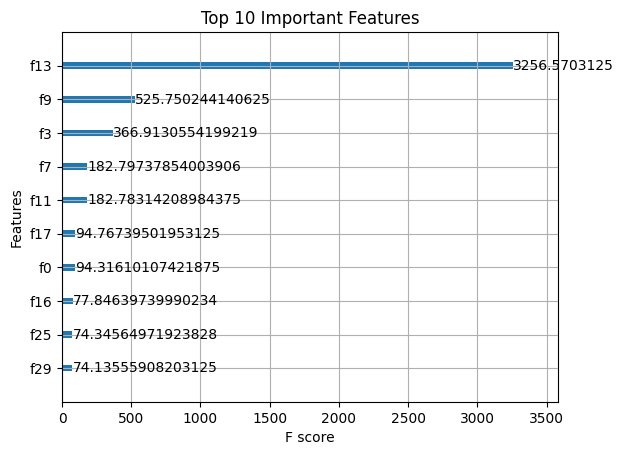

<ipython-input-1-72810cbec2e7>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


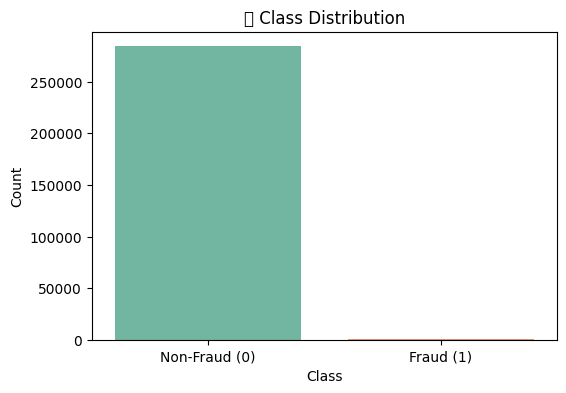

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


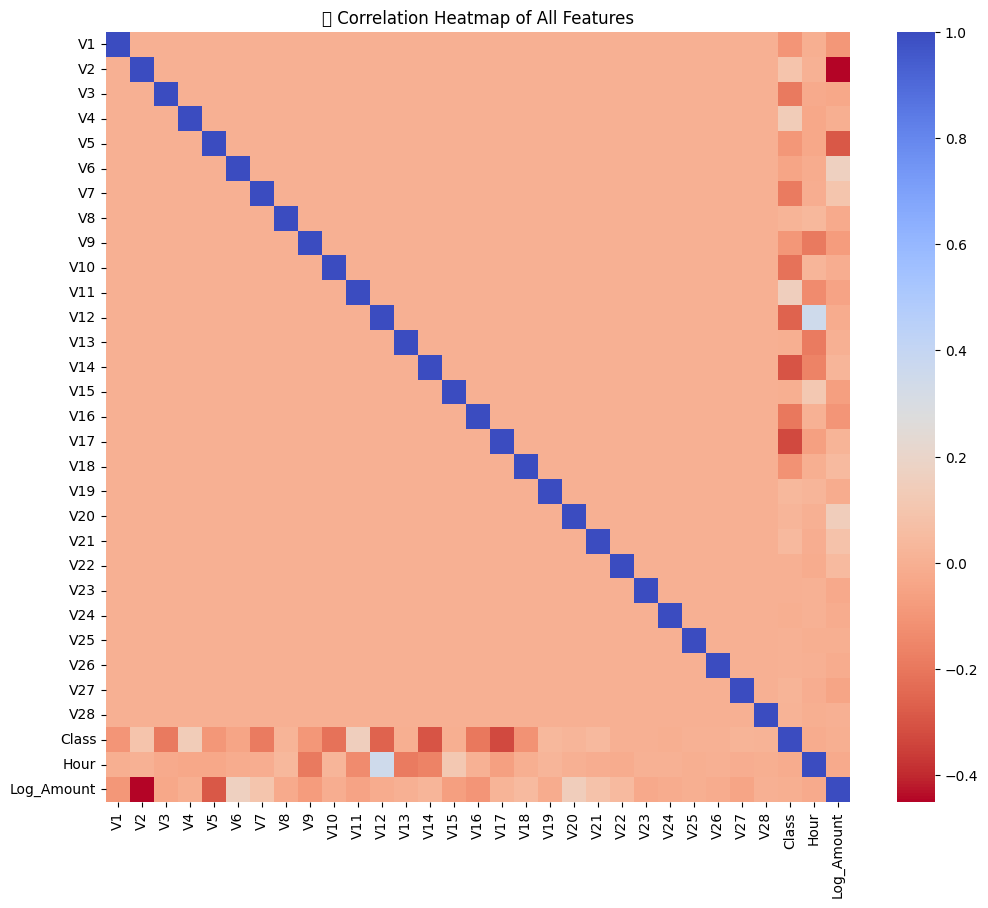

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


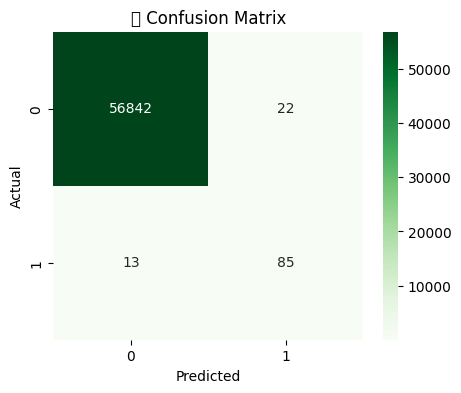

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


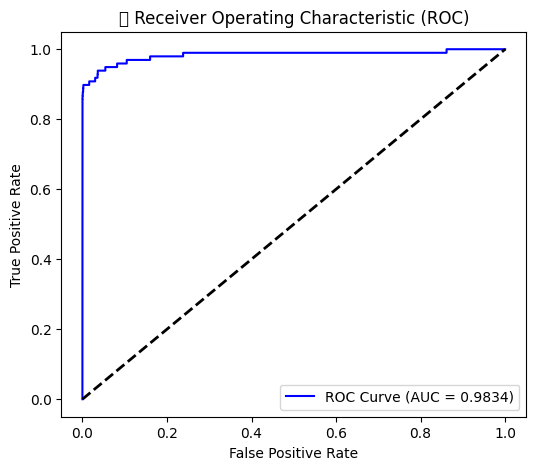

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128228 (\N{OUTBOX TRAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


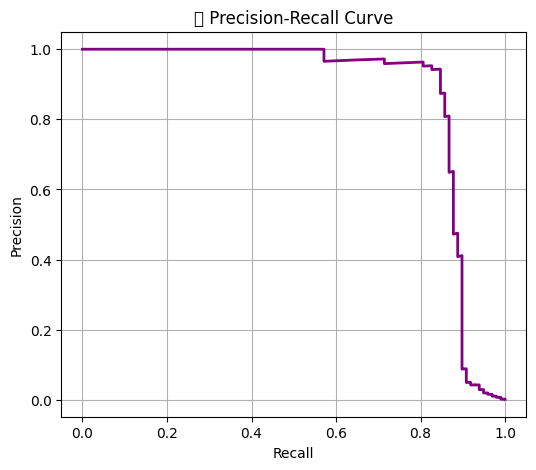

<ipython-input-1-72810cbec2e7>:139: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


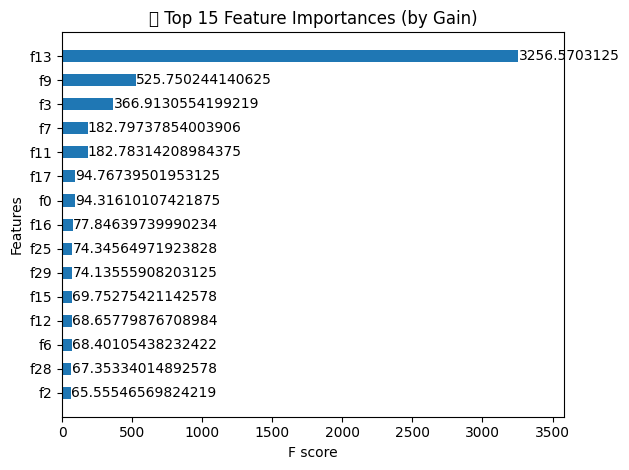

<ipython-input-1-72810cbec2e7>:149: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


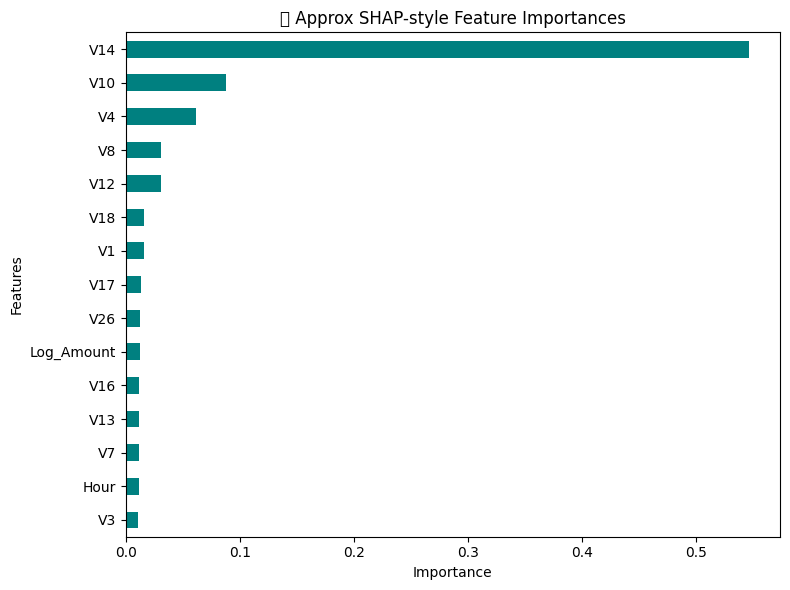

In [1]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.gridspec as gridspec

# 📌 2. Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

# 📌 3. Feature Engineering
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600) % 24)
df['Log_Amount'] = np.log1p(df['Amount'])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# 📌 4. Split Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

# 📌 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 📌 6. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 7. Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# 📌 8. Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_cv = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=25,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_cv.fit(X_train_res, y_train_res)
best_xgb = random_cv.best_estimator_

# 📌 9. Evaluation
y_pred_best = best_xgb.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)
roc = roc_auc_score(y_test, y_pred_best)
acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best)
rec = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print("🔹 [TUNED] Confusion Matrix:\n", conf_matrix)
print("\n🔹 [TUNED] Classification Report:\n", class_report)
print("🔹 [TUNED] ROC AUC Score:", roc)
print("🔹 [TUNED] Accuracy:", acc)
print("🔹 [TUNED] Precision:", prec)
print("🔹 [TUNED] Recall:", rec)
print("🔹 [TUNED] F1 Score:", f1)

# 📌 10. Feature Importance
xgb.plot_importance(best_xgb, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()
# ⚙️ Import Extra Libraries for Visualization
# 🔁 1. Distribution of Fraud vs Normal
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("🔍 Class Distribution")
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 🧠 2. Correlation Heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title("📊 Correlation Heatmap of All Features")
plt.show()

# 🔄 3. Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("✅ Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🧪 4. ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_xgb.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# ⚖️ 5. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_xgb.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("📤 Precision-Recall Curve")
plt.grid()
plt.show()

# 📌 6. Top Feature Importance by Gain
plt.figure(figsize=(10,6))
xgb.plot_importance(best_xgb, importance_type='gain', max_num_features=15, height=0.5, grid=False)
plt.title("🔥 Top 15 Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

# 💡 7. Optional: SHAP-like Summary Plot Approximation (Bar chart)
feat_importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8,6), color='teal')
plt.title("📊 Approx SHAP-style Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

